In [36]:
import json
import seaborn as sns
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np


In [85]:

file_path = r'C:\Users\rvmzw\Documents\GitHub\USV_Swarm_MARL\results_for_analysis\random_result.json'

with open(file_path, 'r') as file:
    data = json.load(file)

random_df = pd.DataFrame(data)
random_df['Episode'] = range(1, len(random_df) + 1)


      blue win  red win  draw  blue reward  timestep  blue catch  blue attack  \
0          0.0      1.0   0.0     5.251814      85.0         0.0     0.002429   
1          0.0      1.0   0.0     3.049996      87.0         0.0     0.000000   
2          0.0      1.0   0.0     5.099992      84.0         0.0     0.000000   
3          0.0      1.0   0.0     5.099992      84.0         0.0     0.000000   
4          0.0      1.0   0.0     5.099992      84.0         0.0     0.000000   
...        ...      ...   ...          ...       ...         ...          ...   
4995       0.0      1.0   0.0     5.099992      84.0         0.0     0.000000   
4996       0.0      1.0   0.0     2.449999      83.0         0.0     0.000000   
4997       0.0      1.0   0.0     4.949992      83.0         0.0     0.000000   
4998       0.0      1.0   0.0     5.399991      86.0         0.0     0.000000   
4999       0.0      1.0   0.0     2.599998      84.0         0.0     0.000000   

      blue island dead  blu

In [86]:
def get_df(log_file_path):
        
    data = []

    pattern = r"Episode:\s+(\d+)\s+\| blue win:\s+([\d.]+)\s+\| red win:\s+([\d.]+)\s+\| draw:\s+([\d.]+)\s+\| blue reward:\s+([\d.]+)\s+\| timestep:\s+([\d.]+)\s+\| blue catch:\s+([\d.]+)\s+\| blue attack:\s+([\d.]+)\s+\| blue island dead:\s+([\d.]+)\s+\| blue reward feedback:\s+([\d.]+)\s+\| seed:\s+([\d.]+)"

    with open(log_file_path, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                data.append({
                    "Episode": int(match.group(1)),
                    "blue win": float(match.group(2)),
                    "red win": float(match.group(3)),
                    "draw": float(match.group(4)),
                    "blue reward": float(match.group(5)),
                    "timestep": float(match.group(6)),
                    "blue catch": float(match.group(7)),
                    "blue attack": float(match.group(8)),
                    "blue island dead": float(match.group(9)),
                    "blue reward feedback": float(match.group(10)),
                    "seed": float(match.group(11))
                })

    df = pd.DataFrame(data)
    df["Episode"] = df["Episode"] - 1
    
    return df 

In [87]:

log_file_path = r"C:\Users\rvmzw\Documents\GitHub\USV_Swarm_MARL\results_for_analysis\comm_team.log"

comm_team = get_df(log_file_path)

log_file_path = r"C:\Users\rvmzw\Documents\GitHub\USV_Swarm_MARL\results_for_analysis\w_team.log"

team = get_df(log_file_path)

log_file_path = r"C:\Users\rvmzw\Documents\GitHub\USV_Swarm_MARL\results_for_analysis\w_comm.log"

comm = get_df(log_file_path)

log_file_path = r"C:\Users\rvmzw\Documents\GitHub\USV_Swarm_MARL\results_for_analysis\embed.log"

embed = get_df(log_file_path)




In [94]:
episode_limit = 2500
comm = comm[comm['Episode'] <= episode_limit]
random_df = random_df[random_df['Episode'] <= episode_limit]
comm_team = comm_team[comm_team['Episode'] <= episode_limit]
team = team[team['Episode'] <= episode_limit]
embed = embed[embed['Episode'] <= episode_limit]


In [95]:
def plot_episodes_with_avg(dfs, column_name, title="Plot", labels=None, avg_window=10):
    sns.set_theme()
    plt.figure(figsize=(10, 6))
    
    if labels is None:
        labels = [f"DataFrame {i + 1}" for i in range(len(dfs))]
    
    for df, label in zip(dfs, labels):
        averaged_rewards = []
        for i in range(0, len(df), avg_window):
            avg = df[column_name].iloc[i:i+avg_window].mean() 
            averaged_rewards.append(avg)
        
        averaged_episodes = np.arange(1, len(df) + 1, avg_window)
        
        # Plot the averaged data
        plt.plot(averaged_episodes, averaged_rewards, label=label)
    
    # Add legend, labels, and title
    plt.legend(title="Legend")
    plt.xlabel("Episode")
    plt.ylabel(column_name)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [112]:
def plot_episodes(dfs, column_name, title="", labels=None, window_size = 200):

    

    sns.set_theme()
    plt.figure(figsize=(8, 5))
    
    for df, label in zip(dfs, labels):
        smoothed_data = df[column_name].rolling(window = window_size, min_periods=1).mean()
        plt.plot(df["Episode"], smoothed_data, label=label)    

    plt.legend(title="Model")
    plt.xlabel("Episode")
    plt.ylabel(column_name)
    plt.title(title)
    plt.tight_layout()
    plt.show()

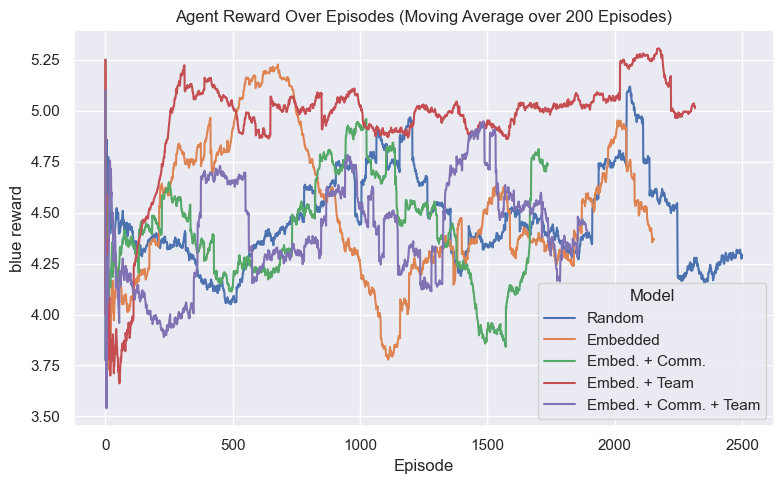

In [114]:
plot_episodes([random_df, embed, comm, team, comm_team], column_name="blue reward", title="Agent Reward Over Episodes (Moving Average over 200 Episodes)", labels = ['Random', 'Embedded', 'Embed. + Comm.', 'Embed. + Team', 'Embed. + Comm. + Team'])

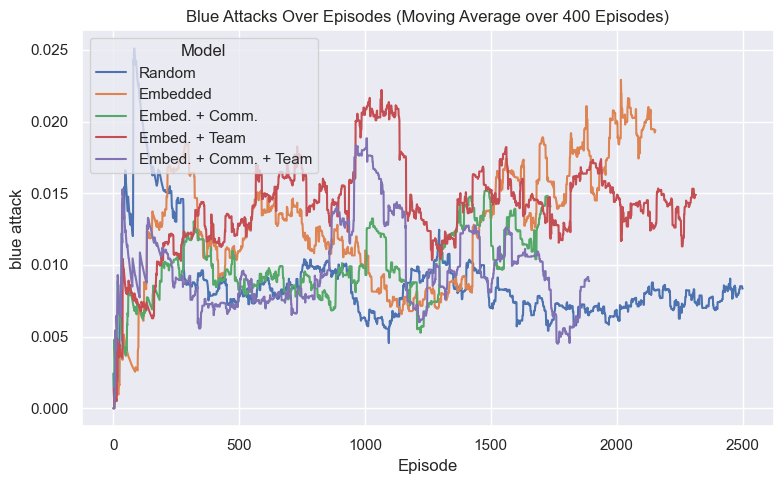

In [115]:
plot_episodes([random_df, embed, comm, team, comm_team], column_name="blue attack", title="Blue Attacks Over Episodes (Moving Average over 400 Episodes)", labels = ['Random', 'Embedded', 'Embed. + Comm.', 'Embed. + Team', 'Embed. + Comm. + Team'], window_size = 200)

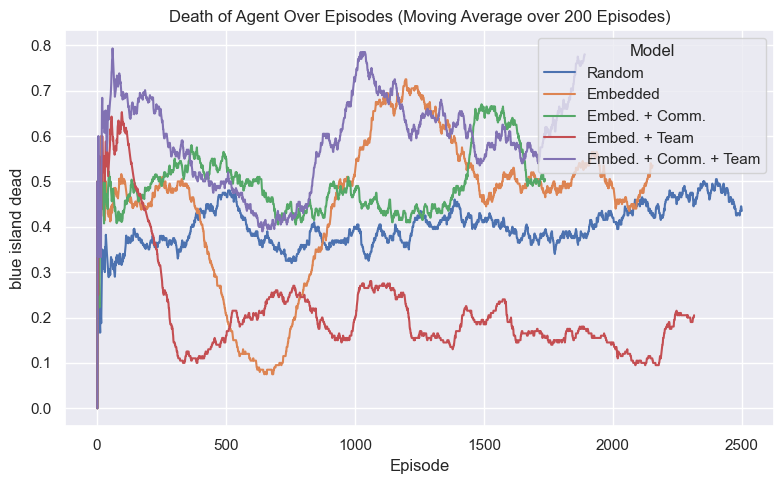

In [117]:
plot_episodes([random_df, embed, comm, team, comm_team], column_name="blue island dead", title="Agent Crashed in Island over Episodes (Moving Average over 200 Episodes)", labels = ['Random', 'Embedded', 'Embed. + Comm.', 'Embed. + Team', 'Embed. + Comm. + Team'])


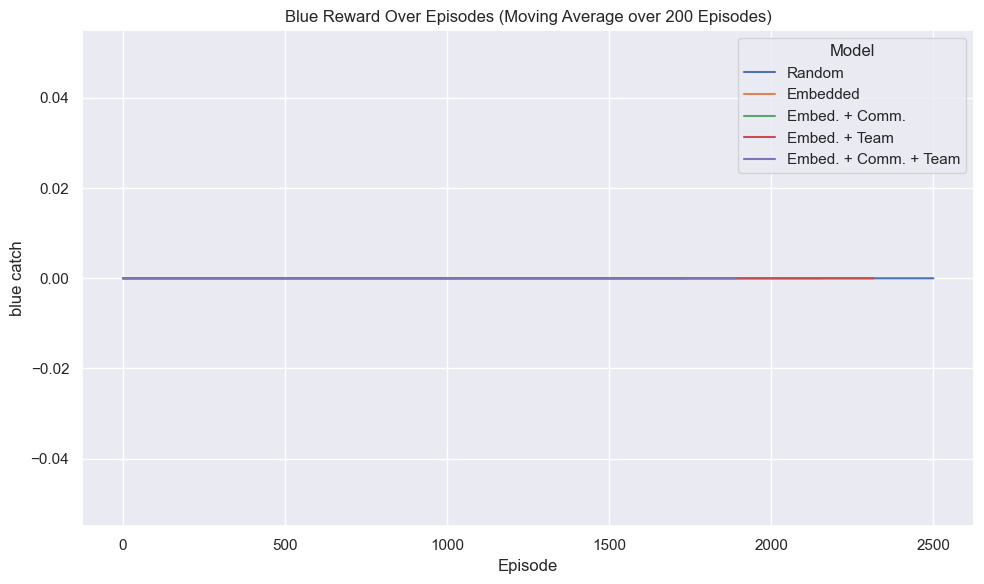

In [100]:
plot_episodes([random_df, embed, comm, team, comm_team], column_name="blue catch", title="Blue Reward Over Episodes (Moving Average over 200 Episodes)", labels = ['Random', 'Embedded', 'Embed. + Comm.', 'Embed. + Team', 'Embed. + Comm. + Team'])


In [53]:
#plot_episodes_with_avg([random_df, embed, comm, team, comm_team], column_name="blue reward", title="Blue Reward Over Episodes (Moving Average over 500 Episodes)", labels = ['Random', 'Embedded', 'Embed. + Comm.', 'Embed. + Team', 'Embed. + Comm. + Team'], avg_window=10)